In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm

In [2]:
#Modifique el número de puntos de la red (N dimensión x y M dimensión en y) y el paso dimensional ()
N, M = 51,51
h = 0.05
x = np.linspace(0,N*h-h,N)
y = np.linspace(0,M*h-h,M)

#Valor de la condición de forntera
V0 = 10
print(len(y))
x

51


array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 ])

In [3]:
#COnstrucción de la región rectangular con condiciones de forntera
def InitV():
    
    V = np.zeros((N,M))
    
    V[0,:] = 0.
    V[-1,:] = 0.
    V[:,0] = -V0
    V[:,-1] = V0
    
    return V

In [4]:
V = InitV()
V

array([[-10.,   0.,   0., ...,   0.,   0.,  10.],
       [-10.,   0.,   0., ...,   0.,   0.,  10.],
       [-10.,   0.,   0., ...,   0.,   0.,  10.],
       ...,
       [-10.,   0.,   0., ...,   0.,   0.,  10.],
       [-10.,   0.,   0., ...,   0.,   0.,  10.],
       [-10.,   0.,   0., ...,   0.,   0.,  10.]])

In [5]:
def Relajacion(V,Nit = 10**5, omega = 0.5 ,tolerancia = 1e-3):
    
    itmax = 0
    
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                
                volt = 0.25*( V[i+1,j] + V[i-1,j] + V[i,j+1] + V[i,j-1] )
                
                # Matriz resta
                r = omega*(volt - V[i,j])
                
                # Actualizo la matrix
                V[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
                    
        #print(np.round(T,2))
                
        
        if np.abs(dmax) < tolerancia:
            
            print(it)
            itmax = it
            break
            
    return V,itmax

In [6]:
V_sol,_ =  Relajacion(V)

  1%|▋                                                                           | 935/100000 [00:07<12:54, 127.84it/s]

935


<IPython.core.display.Javascript object>


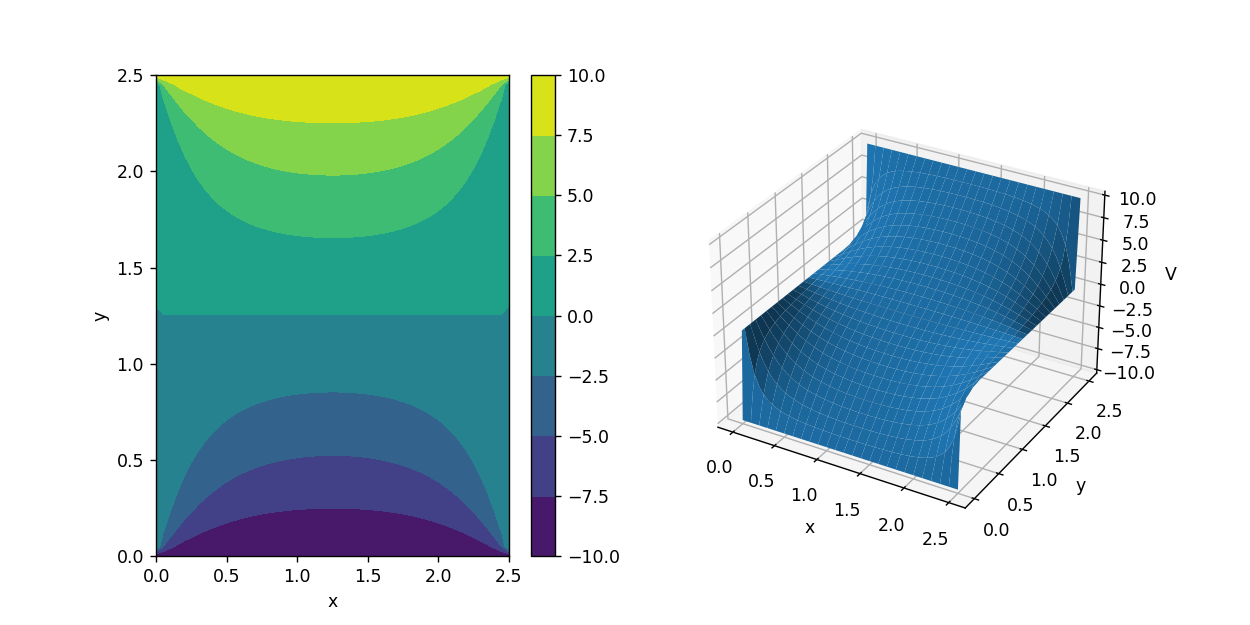

In [15]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax1 = fig.add_subplot(122, projection='3d')

X,Y = np.meshgrid(x,y)

c = ax.contourf(X,Y,V_sol.T)

ax1.plot_surface(X,Y,V_sol.T)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('V')
fig.colorbar(c, ax=ax)

In [9]:
u,v = np.gradient(V_sol)
u = -u
v = -v

<IPython.core.display.Javascript object>


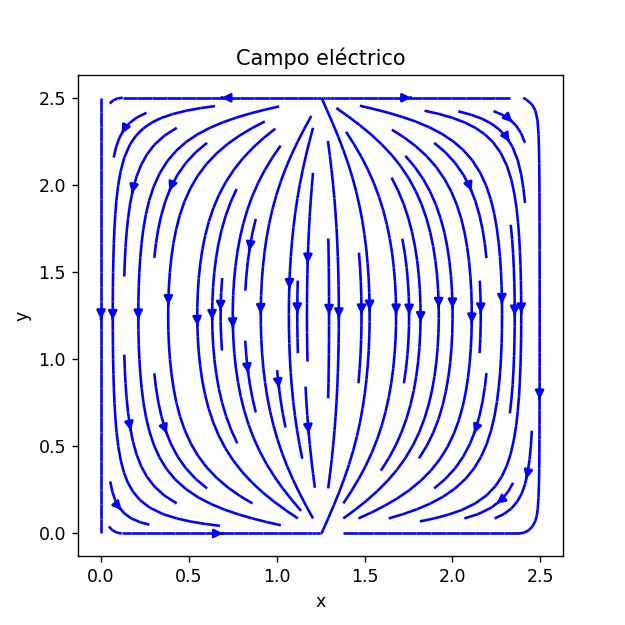

In [11]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Campo eléctrico')
ax.streamplot(x,y,u,v,color='b',density=1)